In [61]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import *
from facenet_pytorch import MTCNN, InceptionResnetV1
%matplotlib inline

In [62]:
def get_config():
    config = {
        'dataset':"./test_data",
        'weight':"./weight.pth",
        'classes':['class_1', 'class_2', 'class_3', 'class_4'] # write class names in alphabetical order
    }
    return config

In [63]:
def prewhiten(x):
    mean = x.mean()
    std = x.std()
    std_adj = std.clamp(min=1.0/(float(x.numel())**0.5))
    y = (x - mean) / std_adj
    return y

In [64]:
def run(config):    
    # device = 'cuda' if torch.cuda.is_available() else 'cpu'
    device = 'cpu'
    resnet = InceptionResnetV1(classify=True,num_classes=4).to(device).eval()
    resnet.load_state_dict(torch.load(config['weight'], map_location=torch.device(device)))
    transform = transforms.Compose([
        Resize((160,160)),
        np.float32,
        ToTensor(),
        prewhiten
    ])    
    print("start predict")
    for path in glob.glob("{}/*".format(config['dataset'])):
        img = Image.open(path)
        tensor_img = transform(img).unsqueeze(0)
        pred = resnet(tensor_img)
        plt.imshow(img)
        plt.show()
        pred = F.softmax(pred[0], dim=0)
        pred_label = config['classes'][torch.argmax(pred)]
        for i, c in enumerate(config['classes']):
            print("{} :{:.2f}%".format(c,pred[i]*100))
        print("result :{}".format(pred_label))

start predict


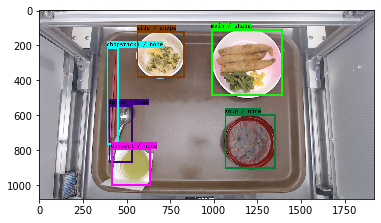

class_1 :98.88%
class_2 :0.86%
class_3 :0.06%
class_4 :0.20%
result :class_1


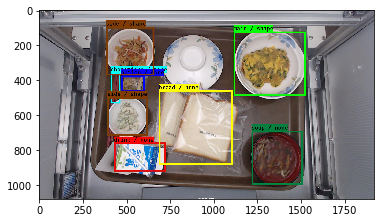

class_1 :99.42%
class_2 :0.27%
class_3 :0.10%
class_4 :0.21%
result :class_1


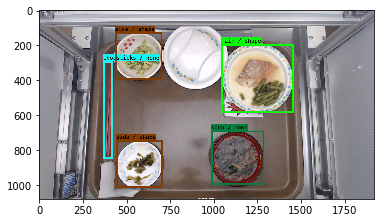

class_1 :99.37%
class_2 :0.33%
class_3 :0.08%
class_4 :0.23%
result :class_1


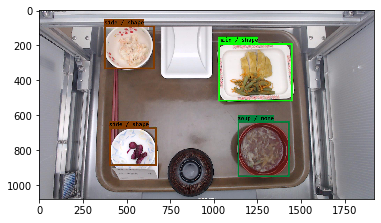

class_1 :99.38%
class_2 :0.33%
class_3 :0.08%
class_4 :0.22%
result :class_1


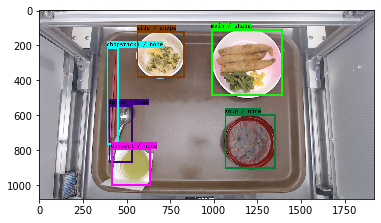

class_1 :98.88%
class_2 :0.86%
class_3 :0.06%
class_4 :0.20%
result :class_1


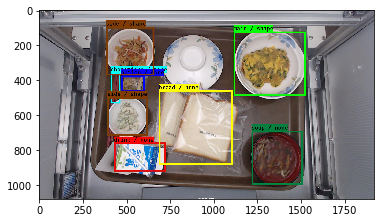

class_1 :99.42%
class_2 :0.27%
class_3 :0.10%
class_4 :0.21%
result :class_1


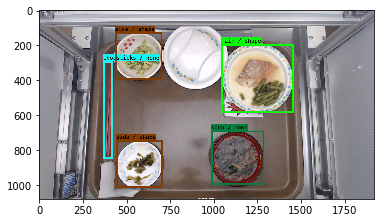

class_1 :99.37%
class_2 :0.33%
class_3 :0.08%
class_4 :0.23%
result :class_1


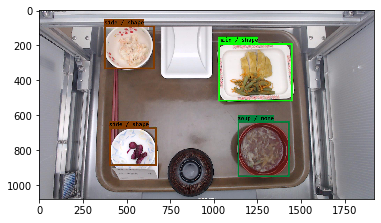

class_1 :99.38%
class_2 :0.33%
class_3 :0.08%
class_4 :0.22%
result :class_1


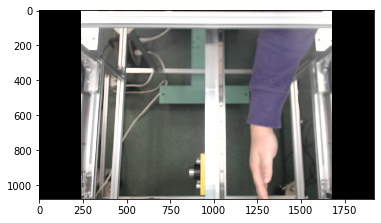

class_1 :92.80%
class_2 :6.71%
class_3 :0.05%
class_4 :0.44%
result :class_1


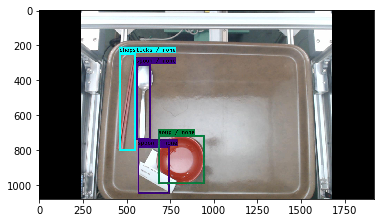

class_1 :98.94%
class_2 :0.46%
class_3 :0.04%
class_4 :0.56%
result :class_1


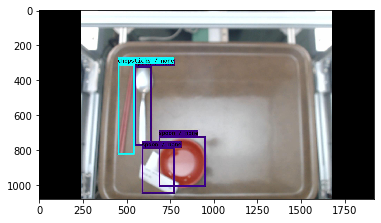

class_1 :99.11%
class_2 :0.48%
class_3 :0.05%
class_4 :0.36%
result :class_1


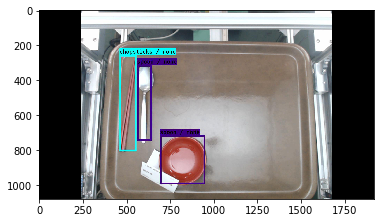

class_1 :98.99%
class_2 :0.28%
class_3 :0.04%
class_4 :0.69%
result :class_1


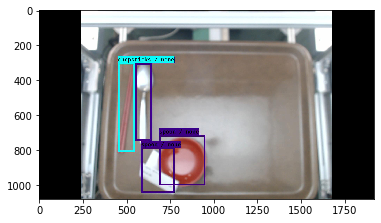

class_1 :99.12%
class_2 :0.44%
class_3 :0.05%
class_4 :0.40%
result :class_1


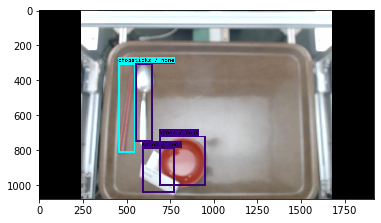

class_1 :98.97%
class_2 :0.62%
class_3 :0.04%
class_4 :0.37%
result :class_1


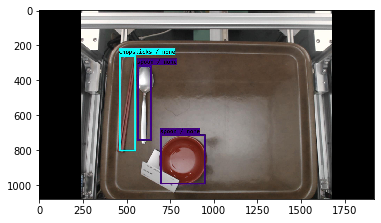

class_1 :99.28%
class_2 :0.24%
class_3 :0.06%
class_4 :0.43%
result :class_1


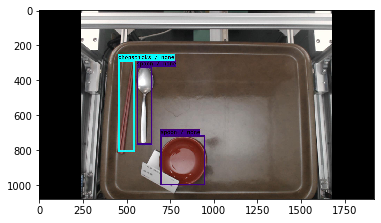

class_1 :99.26%
class_2 :0.25%
class_3 :0.06%
class_4 :0.44%
result :class_1


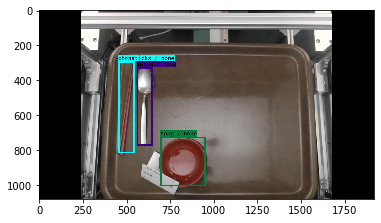

class_1 :99.33%
class_2 :0.29%
class_3 :0.06%
class_4 :0.32%
result :class_1


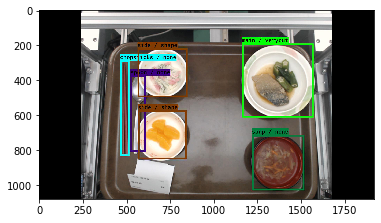

class_1 :99.43%
class_2 :0.26%
class_3 :0.09%
class_4 :0.23%
result :class_1


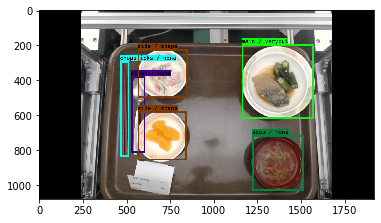

class_1 :99.42%
class_2 :0.25%
class_3 :0.09%
class_4 :0.24%
result :class_1


In [65]:
config = get_config()
run(config)